In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_raw_bfbans = pd.read_csv("../data/v2/raw_bfban_players_data.csv")

In [3]:
df_raw_bfbans["cheatMethods"] = df_raw_bfbans["cheatMethods"].apply(json.loads)

In [4]:
# Get a list of origin persona IDs from the bf ban data
aimbot_origin_persona_ids = list(
    df_raw_bfbans[df_raw_bfbans["cheatMethods"].apply(lambda x: "aimbot" in x)][
        "originPersonaId"
    ]
)

In [5]:
unknowns_csv_file_path = "../data/v2/raw_gt_unknown_stats.csv"
cheaters_csv_file_path = "../data/v2/raw_gt_cheater_stats.csv"

df_unknowns = pd.read_csv(unknowns_csv_file_path)
df_cheaters = pd.read_csv(cheaters_csv_file_path)

In [6]:
df_cheaters["cheater"] = 1
df_unknowns["cheater"] = 0

In [7]:
# Filter out users who have not used aimbots
df_cheaters = df_cheaters[
    df_cheaters["id"].apply(lambda id: id in aimbot_origin_persona_ids)
]

In [8]:
df = pd.concat([df_unknowns, df_cheaters], ignore_index=True)

In [9]:
df = df.drop_duplicates(subset=["id"])

In [10]:
df

,weapons,vehicles,classes,gamemodes,maps,id,rank,kills,deaths,wins,...,repairs,resupplies,dividedResupplies,devidedDamage,highestKillStreak,roundsPlayed,objective,dividedKills,devidedScore,cheater
0,"[{""type"": ""Mmg"", ""weaponName"": ""MG 42"", ""image...","[{""type"": ""Tanks"", ""vehicleName"": ""STURMTIGER""...","[{""className"": ""Assault"", ""image"": ""https://cd...","[{""gamemodeName"": ""Domination"", ""id"": ""dom"", ""...","[{""mapName"": ""Fjell 652"", ""image"": ""https://ea...",1006197593307,45.0,2338.0,1672.0,60.0,...,0.0,784.0,"{""support"": 315.0, ""medic"": 387.0}","{""toVehicle"": 4691.0, ""toSoldier"": 303620.0}",17.0,105.0,"{""score"": 231475.0, ""armed"": 1.0, ""destroyed"":...","{""nemesis"": 551.0, ""pvp"": 2338.0, ""offensive"":...","{""weapons"": {""general"": 411249.0, ""mmgs"": 686....",0
1,"[{""type"": ""Mmg"", ""weaponName"": ""MG 42"", ""image...","[{""type"": ""Tanks"", ""vehicleName"": ""STURMTIGER""...","[{""className"": ""Assault"", ""image"": ""https://cd...","[{""gamemodeName"": ""Domination"", ""id"": ""dom"", ""...","[{""mapName"": ""Fjell 652"", ""image"": ""https://ea...",1005400216254,24.0,607.0,1266.0,52.0,...,1186.0,69.0,"{""support"": 12.0, ""medic"": 26.0}","{""toVehicle"": 1017.0, ""toSoldier"": 80379.0}",10.0,88.0,"{""score"": 106275.0, ""armed"": 0, ""destroyed"": 0...","{""nemesis"": 123.0, ""pvp"": 607.0, ""offensive"": ...","{""weapons"": {""general"": 104091.0, ""mmgs"": 0, ""...",0
2,"[{""type"": ""Mmg"", ""weaponName"": ""MG 42"", ""image...","[{""type"": ""Tanks"", ""vehicleName"": ""STURMTIGER""...","[{""className"": ""Assault"", ""image"": ""https://cd...","[{""gamemodeName"": ""Domination"", ""id"": ""dom"", ""...","[{""mapName"": ""Fjell 652"", ""image"": ""https://ea...",1004525777259,13.0,241.0,440.0,7.0,...,0.0,188.0,"{""support"": 4.0, ""medic"": 174.0}","{""toVehicle"": 1521.0, ""toSoldier"": 32314.0}",8.0,23.0,"{""score"": 37650.0, ""armed"": 0, ""destroyed"": 0,...","{""nemesis"": 27.0, ""pvp"": 241.0, ""offensive"": 6...","{""weapons"": {""general"": 35904.0, ""mmgs"": 0, ""l...",0
3,"[{""type"": ""Mmg"", ""weaponName"": ""MG 42"", ""image...","[{""type"": ""Tanks"", ""vehicleName"": ""STURMTIGER""...","[{""className"": ""Assault"", ""image"": ""https://cd...","[{""gamemodeName"": ""Domination"", ""id"": ""dom"", ""...","[{""mapName"": ""Fjell 652"", ""image"": ""https://ea...",1962861840,39.0,1672.0,1373.0,60.0,...,85.0,252.0,"{""support"": 20.0, ""medic"": 191.0}","{""toVehicle"": 10620.0, ""toSoldier"": 211960.0}",14.0,114.0,"{""score"": 237724.0, ""armed"": 0, ""destroyed"": 0...","{""nemesis"": 358.0, ""pvp"": 1672.0, ""offensive"":...","{""weapons"": {""general"": 285781.0, ""mmgs"": 50.0...",0
4,"[{""type"": ""Mmg"", ""weaponName"": ""MG 42"", ""image...","[{""type"": ""Tanks"", ""vehicleName"": ""STURMTIGER""...","[{""className"": ""Assault"", ""image"": ""https://cd...","[{""gamemodeName"": ""Domination"", ""id"": ""dom"", ""...","[{""mapName"": ""Fjell 652"", ""image"": ""https://ea...",1925515779,10.0,179.0,280.0,14.0,...,0.0,14.0,"{""support"": 4.0, ""medic"": 0}","{""toVehicle"": 691.0, ""toSoldier"": 29434.0}",6.0,30.0,"{""score"": 34450.0, ""armed"": 0, ""destroyed"": 0,...","{""nemesis"": 19.0, ""pvp"": 179.0, ""offensive"": 5...","{""weapons"": {""general"": 44992.0, ""mmgs"": 81.0,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23281,"[{""type"": ""Mmg"", ""weaponName"": ""MG 42"", ""image...","[{""type"": ""Tanks"", ""vehicleName"": ""STURMTIGER""...","[{""className"": ""Assault"", ""image"": ""https://cd...","[{""gamemodeName"": ""Domination"", ""id"": ""dom"", ""...","[{""mapName"": ""Fjell 652"", ""image"": ""https://ea...",1003983450579,49.0,5541.0,424.0,36.0,...,0.0,489.0,"{""support"": 366.0, ""medic"": 68.0}","{""toVehicle"": 703.0, ""toSoldier"": 612537.0}",78.0,47.0,"{""score"": 215800.0, ""armed"": 0, ""destroyed"": 0...","{""nemesis"": 2174.0, ""pvp"": 5541.0, ""offensive""...","{""

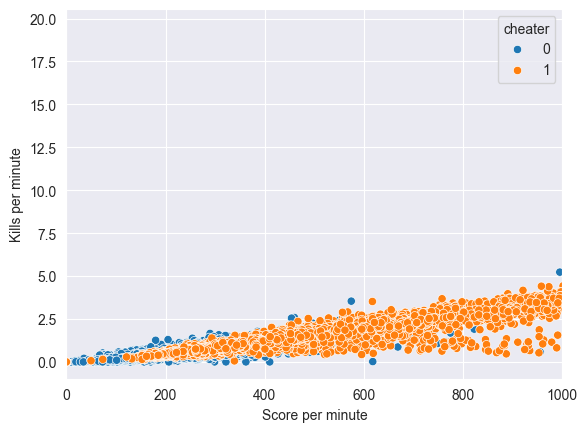

In [11]:
sns.scatterplot(data=df, x="scorePerMinute", y="killsPerMinute", hue="cheater")
plt.xlabel("Score per minute")
plt.ylabel("Kills per minute")
plt.xlim(0, 1000)
plt.show()

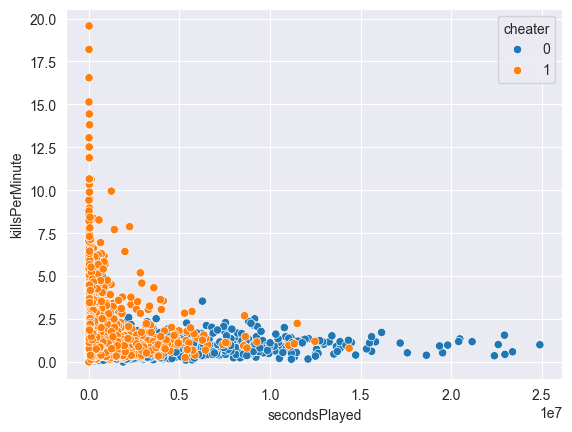

In [12]:
sns.scatterplot(x=df["secondsPlayed"], y=df["killsPerMinute"], hue=df["cheater"])
plt.xlabel("secondsPlayed")
plt.ylabel("killsPerMinute")
plt.show()

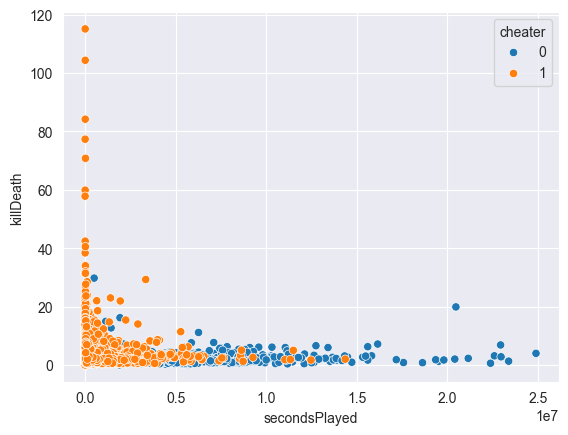

In [13]:
sns.scatterplot(x=df["secondsPlayed"], y=df["killDeath"], hue=df["cheater"])
plt.xlabel("secondsPlayed")
plt.ylabel("killDeath")
plt.show()

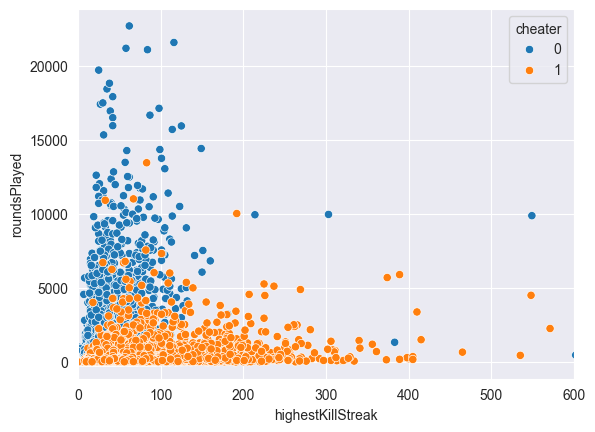

In [14]:
sns.scatterplot(x=df["highestKillStreak"], y=df["roundsPlayed"], hue=df["cheater"])
plt.xlabel("highestKillStreak")
plt.ylabel("roundsPlayed")
plt.xlim(0, 600)
plt.show()

(0.0, 100.0)

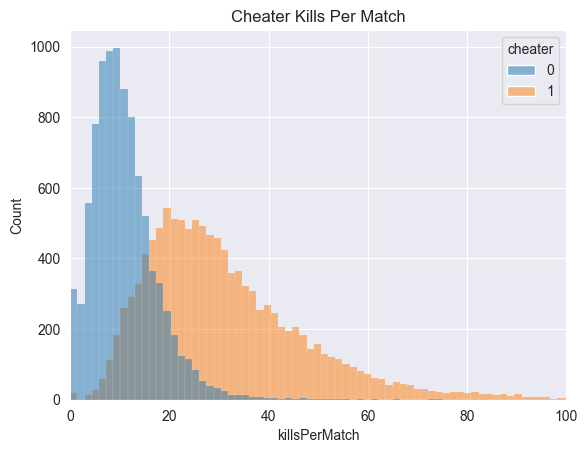

In [15]:
sns.histplot(data=df, x="killsPerMatch", hue="cheater")
plt.title("Cheater Kills Per Match")
plt.xlim(0, 100)

Text(0.5, 1.0, 'Cheater headshots')

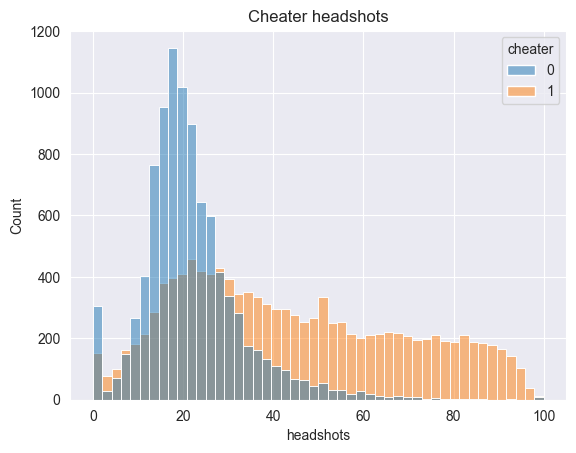

In [16]:
sns.histplot(data=df, x="headshots", hue="cheater")
plt.title("Cheater headshots")

(0.0, 5.0)

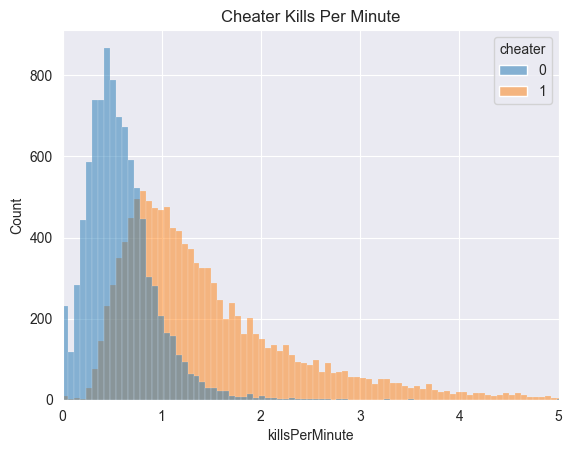

In [17]:
sns.histplot(data=df, x="killsPerMinute", hue="cheater")
plt.title("Cheater Kills Per Minute")
plt.xlim(0, 5)

# Nice heat plot guide from 

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

<Axes: >

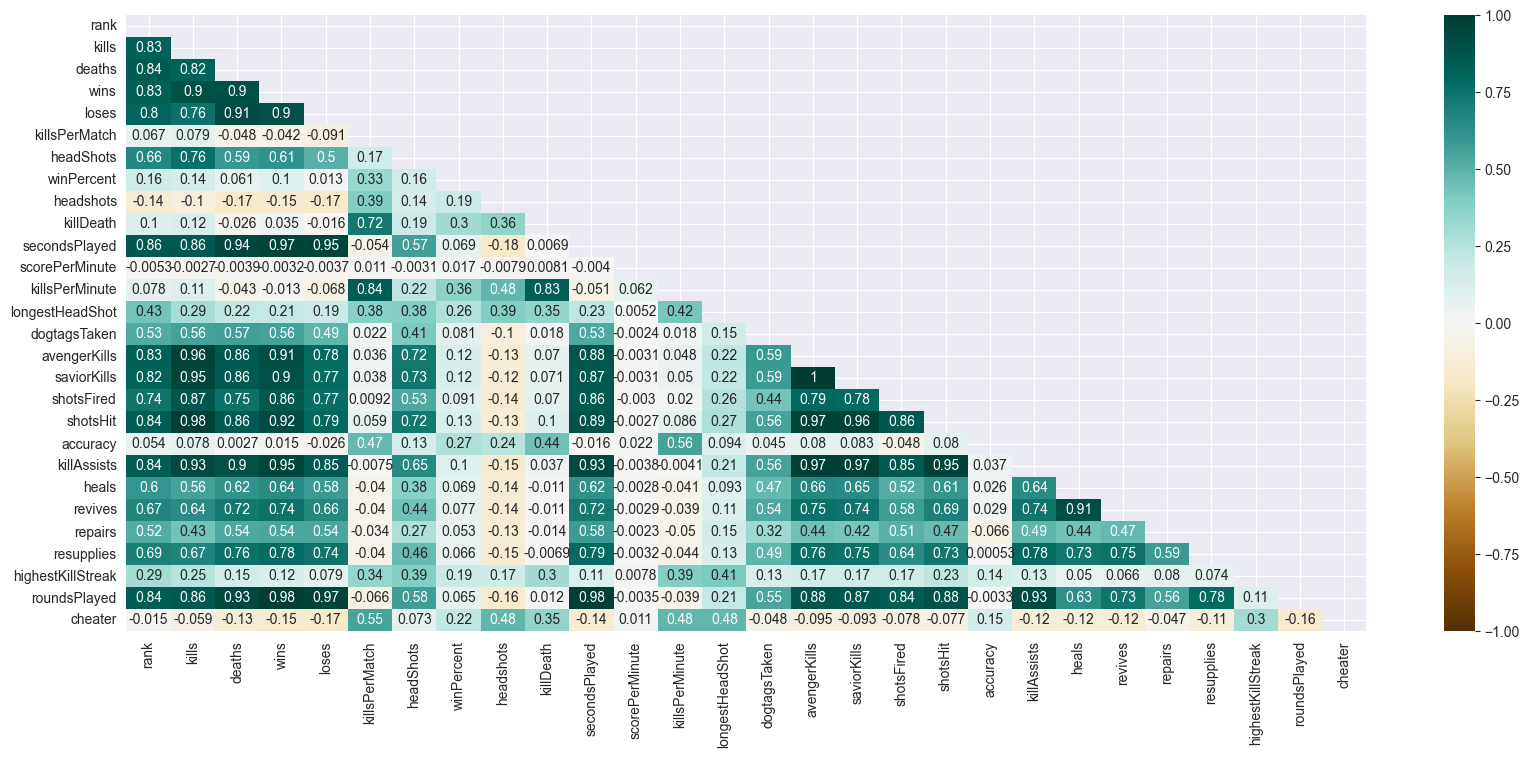

In [18]:
heatmap_df = df.drop(
    columns=[
        "weapons",
        "vehicles",
        "classes",
        "gamemodes",
        "maps",
        "id",
        "timePlayed",
        "dividedResupplies",
        "devidedDamage",
        "objective",
        "dividedKills",
        "devidedScore",
        "bonusScore",
        "awardScore",
        "squadScore",
    ]
)
mask = np.triu(np.ones_like(heatmap_df.corr()))

plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="BrBG")

<Axes: >

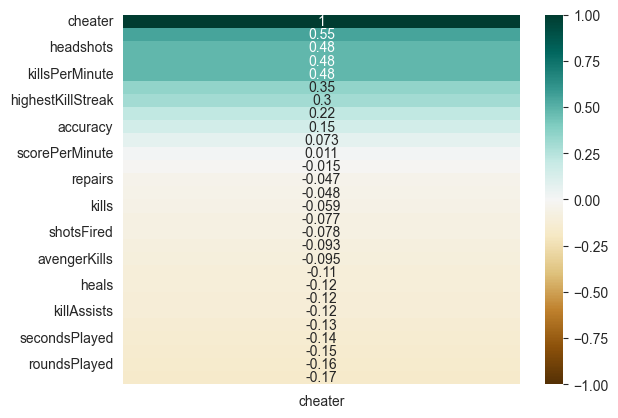

In [19]:
sns.heatmap(
    heatmap_df.corr()[["cheater"]].sort_values(by="cheater", ascending=False),
    vmax=1,
    vmin=-1,
    annot=True,
    cmap="BrBG",
)